In [192]:
#LIBRARIES 
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# machine learning

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data pre-processing

In [193]:
df=pd.read_csv('arrhythmia.data',header=None, na_values = '?')

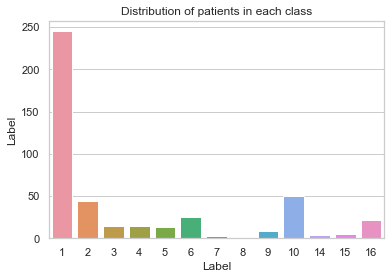

In [203]:
#identify the target
df.rename(columns={279:'Label'},inplace=True)
sns.barplot(data=df,x='Label',y='Label', estimator = len)
plt.title('Distribution of patients in each class')
plt.show()

# Binary classification 1/0

In [667]:
df_binary=df.copy()
df_binary.Label=df_binary.Label.apply(lambda x: 0 if x==1 else 1)
df_binary.head(10)

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,275,276,277,278,Label
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,1
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,0
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,1
5,13,0,169,51,100,167,321,174,91,107,...,0.0,-0.6,12.2,-2.8,0.0,0.9,2.2,13.5,31.1,1
6,40,1,160,52,77,129,377,133,77,77,...,-0.4,0.0,6.5,0.0,0.0,0.4,1.0,14.3,20.5,0
7,49,1,162,54,78,0,376,157,70,67,...,-0.3,0.0,8.2,-1.9,0.0,0.1,0.5,15.8,19.8,0
8,44,0,168,56,84,118,354,160,63,61,...,0.1,0.0,7.0,-1.3,0.0,0.6,2.1,12.5,30.9,0
9,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0.0,0.8,0.9,20.1,25.1,1


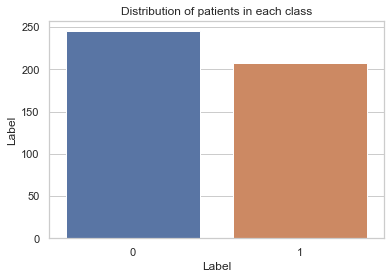

In [671]:
sns.barplot(data=df_binary,x='Label',y='Label', estimator = len)
plt.title('Distribution of patients in each class')
plt.show()

### Processing columns with identical values 

In [195]:
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop.values)
df.drop(cols_to_drop, axis=1, inplace=True)
df.shape


[19 67 69 83 131 132 139 141 143 145 151 156 157 164 204 264 274]


(452, 263)

### Null values processing 

In [196]:
#find "?" values in each column
#replace each of these value with mean(column.values)
df.info(verbose = True, null_counts = True)

#10 -> 444
#11 -> 430
#12 -> 451
#13 -> 76
#14 -> 451

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 263 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       452 non-null    int64  
 1   1       452 non-null    int64  
 2   2       452 non-null    int64  
 3   3       452 non-null    int64  
 4   4       452 non-null    int64  
 5   5       452 non-null    int64  
 6   6       452 non-null    int64  
 7   7       452 non-null    int64  
 8   8       452 non-null    int64  
 9   9       452 non-null    int64  
 10  10      444 non-null    float64
 11  11      430 non-null    float64
 12  12      451 non-null    float64
 13  13      76 non-null     float64
 14  14      451 non-null    float64
 15  15      452 non-null    int64  
 16  16      452 non-null    int64  
 17  17      452 non-null    int64  
 18  18      452 non-null    int64  
 19  20      452 non-null    int64  
 20  21      452 non-null    int64  
 21  22      452 non-null    int64  
 22  2

In [672]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_binary.drop(columns=['Label'],axis=1),df_binary['Label'],test_size=0.2,random_state=1)

X_train[[10,11,12,14]] = X_train[[10,11,12,14]].fillna(X_train.groupby(y_train)[[10,11,12,14]].transform('mean').fillna(X_train[[10,11,12,14]].mean(axis=0)))


X_test[[10,11,12,14]] = X_test[[10,11,12,14]].fillna(X_test.groupby(y_test)[[10,11,12,14]].transform('mean').fillna(X_test[[10,11,12,14]].mean(axis=0)))



In [197]:
df.drop(columns = [13], axis = 1, inplace = True)

### Finding relations between features 

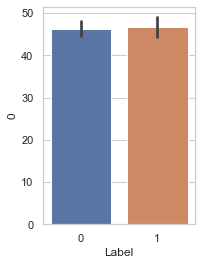

In [636]:
#Relation between Age/Class:
sns.set(style="whitegrid")#画布样式为白色网格
plt.subplot(1,2,1)#该画布有1行2列，最后的1表示该子图在第一列
sns.barplot(data=df_binary,x='Label',y=0)#以Label列作为横轴，以0列作为纵轴，绘制柱状图。

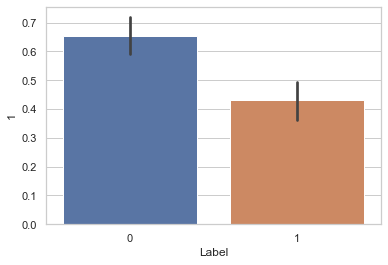

In [637]:
#Relation sex/class: 
sns.barplot(data=df_binary,x='Label',y=1)

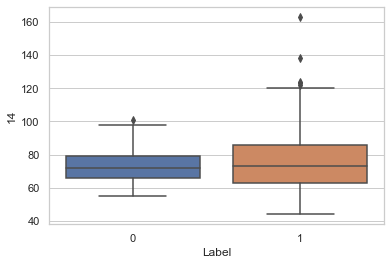

In [665]:
sns.boxplot(data=df_binary,x='Label',y=14)
#14= Heart rate: Number of heart beats per minute

## PCA 

Text(0.5, 1.0, 'y')

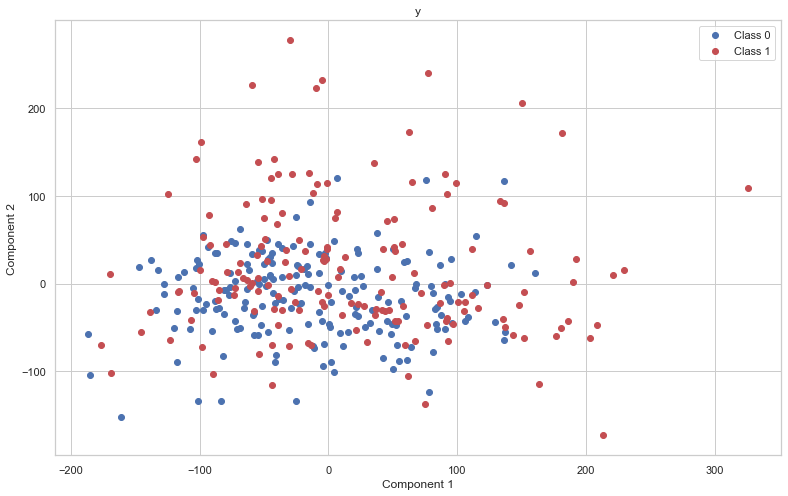

In [662]:
from sklearn.decomposition import PCA

pca = PCA(n_components=90)
X,y = X_train,y_train
comp = pca.fit_transform(X)


### Displaying data in 2-dimensional space of the 2 principal components
plt.figure(1, figsize =(13, 8))
colors = ['b', 'r']
for l in range(2):
    plt.scatter(comp[y==l][:, 0], comp[y==l][:, 1], c=colors[l], label = 'Class ' + str(l))

plt.legend(loc='best')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('y')


[<matplotlib.lines.Line2D at 0x1a345ad470>]

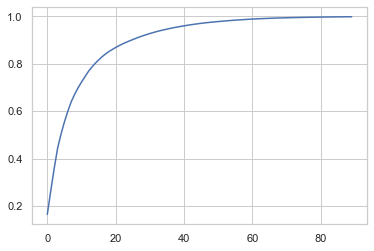

In [663]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Oversampling 

In [210]:
def oversample(df, labels, r = 3, strategy = 'same'):
    max_size = labels.value_counts().max() 
    lst = [df]
    labels_new = [labels]
    for class_index, group in df.groupby(labels):
        if strategy == 'same':
            n_samples = max_size - len(group)
        else:
            n_samples = min(int(len(group)*r), max_size - len(group))  
        lst.append(group.sample(n_samples, replace=True, random_state = 10))
        labels_new.append(pd.Series(n_samples*[class_index]))
    frame_new = pd.concat(lst)
    labels_new = pd.concat(labels_new)
    return(frame_new, labels_new)

#  MODELS 

## Naive Bayes


In [598]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB

#Model
gnb = GaussianNB()


cv_results = cross_validate(gnb,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.718
Testing cross validation accuracy: 0.6702


## Logistic Regression 

In [606]:
#Model
logmodel=LogisticRegression()

cv_results = cross_validate(logmodel,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.899
Testing cross validation accuracy: 0.6761


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the 

### Oversampling with LogRegression

In [600]:
#oversampling
oversample_data,oversample_target= oversample(X_train,y_train,2, strategy = None)

#Model
logmodel=LogisticRegression()

cv_results = cross_validate(logmodel,oversample_data,oversample_target, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

Training cross validation accuracy: 0.905
Testing cross validation accuracy: 0.6789


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## KNN 

In [601]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


#Model
neigh = KNeighborsClassifier(n_neighbors=3)

cv_results = cross_validate(neigh,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.810
Testing cross validation accuracy: 0.6233


## SVM 

In [602]:
#Effective in high dimensional spaces.
#Still effective in cases where number of dimensions is greater than the number of samples.

from sklearn import svm

#Model
model=svm.SVC(kernel='poly',degree=2)


cv_results = cross_validate(model,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.767
Testing cross validation accuracy: 0.7203




## Decision Tree 

In [603]:
from sklearn import tree

#Model
clf = tree.DecisionTreeClassifier(random_state=1)

cv_results = cross_validate(clf,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 1.000
Testing cross validation accuracy: 0.7315


In [588]:
#Overfitting

## XGBoost 

In [302]:
!pip install xgboost

     |████████████████████████████████| 1.1 MB 9.5 MB/s eta 0:00:01


In [310]:
from xgboost import XGBClassifier

In [620]:
xgb = XGBClassifier(eta = 0.6, gamma = 1 , max_depth = 5, min_child_weight = 3, reg_lambda = 10,objective='binary:logistic')
cv_results = cross_validate(xgb,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.987
Testing cross validation accuracy: 0.7894


## Random Forest

In [604]:
from sklearn.ensemble import RandomForestClassifier

#Model 
random_model = RandomForestClassifier(n_estimators=200, max_depth=4, random_state=0)

cv_results = cross_validate(random_model,X_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.901
Testing cross validation accuracy: 0.7534


### Oversampling on RandomForest

In [605]:
#oversampling
oversample_data,oversample_target= oversample(X_train,y_train,2, strategy = None)


#Model
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,
 min_samples_leaf=1,
 min_samples_split =2,
 n_estimators= 100,random_state=1)


cv_results = cross_validate(random_model,oversample_data,oversample_target, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Training cross validation accuracy: 0.997
Testing cross validation accuracy: 0.7874


In [ ]:
## With the previous results, the models with the highest accuracy and best potential are XGboost and Random Forest 

### Parameter tunning with Grid search: Random Forest 

In [213]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [5,20,70],
    'max_features': [40,50,70],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,4,5],
    'n_estimators': [50, 80, 100, 300]
}

model = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=3)

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                  

In [590]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [570]:
rf_grid.best_score_

0.8309687786960515

## Feature selection with RFECV 

Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
F

Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 fe

Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 fe

Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator 

Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
F

Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
F

Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
F

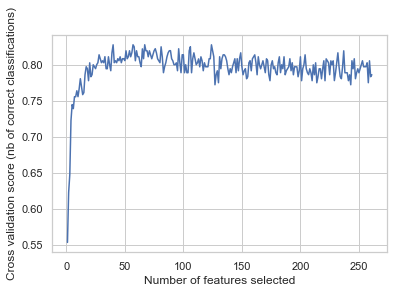

In [214]:
#RFESV 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

#Model 
random_model = RandomForestClassifier(random_state=1)
random_model.fit(X_train,y_train)


# Create the RFE object and compute a cross-validated score.
#Model 
random_model = RandomForestClassifier(random_state=1)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=random_model, step=1, cv=5, scoring='accuracy',verbose=20)
rfecv = rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [625]:
# Optimal number of features: 67 

### Feature selection on Random Forest 

In [216]:
from sklearn.model_selection import cross_val_score
new_cols = train_binary.columns[np.where(rfecv.support_)]

#Model 
random_model = RandomForestClassifier(bootstrap = False, random_state=1)


print(cross_val_score(random_model,X_train[new_cols],y_train).mean())

0.8254946727549468


In [220]:
#Model 
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 20,
 max_features= 40,
 min_samples_leaf=3,
 min_samples_split =3,
 n_estimators= 300,random_state=1)

print(cross_val_score(random_model,X_train[new_cols],y_train).mean())

0.8116818873668189


## Feature selection using mutual information

Iteration  0
Iteration  10
Iteration  20
Iteration  30
Iteration  40
Iteration  50
Iteration  60
Iteration  70
Iteration  80
Iteration  90
Iteration  100
Iteration  110
Iteration  120
Iteration  130
Iteration  140
Iteration  150
Iteration  160
Iteration  170
Iteration  180
Iteration  190


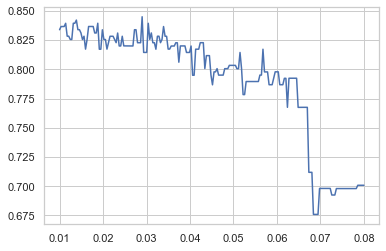

Best threshold:  0.02899497487437186


In [629]:
""" Feature selection using mutual information criteria then in-model feature importance"""
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.model_selection import cross_validate

def mi_classif_random(X,y):
    discrete = np.where(np.sum(X * (1-X) != 0, axis = 0)==0)
    return(mutual_info_classif(X,y, random_state = 1, discrete_features = discrete))
    
mi_selector = SelectKBest(mi_classif)
mi_selector.fit(X_train,y_train)

thresh = np.linspace(0.01, 0.08, 200)
scores = []

for i in range(200):
    
    if i%10 == 0:
        print('Iteration ', i)
        
    t = thresh[i]
    
    cols = X_train.columns[np.where(mi_selector.scores_ > t)]

    random_model = RandomForestClassifier(bootstrap = False, random_state=1)

    selector = SelectFromModel(random_model, threshold = 'mean')
    selector.fit(X_train[cols], y_train)

    train_X = selector.transform(X_train[cols])

    cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)
    
    scores.append(cv_results['test_score'].mean())
    
plt.plot(thresh, scores)
plt.show()

t = thresh[np.argmax(np.array(scores))]

print('Best threshold: ', t)
    

#print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
#print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

In [630]:
cols = X_train.columns[np.where(mi_selector.scores_ > 0.029)]

random_model = RandomForestClassifier(bootstrap = False, 
                                      random_state=1)

selector = SelectFromModel(random_model, threshold = 'mean')
selector.fit(X_train[cols], y_train)

train_X = selector.transform(X_train[cols])

random_model = RandomForestClassifier(bootstrap = False,  random_state=1)

print(train_X.shape)

cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

(361, 30)
Training cross validation accuracy: 1.000
Testing cross validation accuracy: 0.8449


In [631]:
cols[selector.get_support()]

Index([  4,   7,  10,  14,  17,  90,  92, 166, 167, 168, 176, 178, 196, 198,
       206, 208, 210, 223, 227, 236, 237, 242, 246, 249, 258, 259, 269, 275,
       276, 278],
      dtype='object')

### Grid Search on RandomForest model using the previous columns cols 

In [632]:

random_model = RandomForestClassifier(random_state=1)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,20,30,50, None],
    'max_features': [10,20,25,'auto'],
    'min_samples_leaf': [1,3, 6, 9],
    'min_samples_split': [2,3,6,9],
    'n_estimators': [80,100,200]
}

model = RandomForestClassifier(random_state = 1)

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=5)

rf_grid.fit(train_X, y_train)  

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [225]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [226]:
rf_grid.best_score_

0.8309687786960515

In [227]:
#Model using cols and the previous tuned hyper-paramters 
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,
 min_samples_leaf=1,
 min_samples_split =2,
 n_estimators= 100,random_state=1)


cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.990
Testing cross validation accuracy: 0.8478


### Grid search with more precise hyper parameters

In [1032]:

param_grid = {
    'max_depth': [6,8,9,10,11,12,None],
    'max_features': [5,7,9,10,12,14],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,3],
    'n_estimators': [80,90,100,110,120,150]
}

model = RandomForestClassifier(bootstrap = False, random_state = 1)

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=5)

rf_grid.fit(train_X, y_train)  

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 5040 out of 5040 | elapsed: 13.7min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 9, 10, 11, 12, None],
                         'max_features': [5, 7, 9, 10, 12, 14],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [80, 90, 100, 110, 120, 150]},
             verbose=2)

In [228]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [229]:
rf_grid.best_score_

0.8309687786960515

In [230]:
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,
 min_samples_leaf=1,
 min_samples_split =2,
 n_estimators= 100,random_state=1)


cv_results = cross_validate(random_model,train_X,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.990
Testing cross validation accuracy: 0.8478


In [ ]:
# No real change to the test cv accuracy >> I choose to stick to these hyper-parameters 

## Testing the final binary classification model

In [274]:

#other parameters by default 
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,random_state=1)


#Converting to df 
df_train = pd.DataFrame(train_X, columns = cols[selector.get_support()].tolist())

X_test = selector.transform(y_train[cols])
df_test = pd.DataFrame(X_test, columns = cols[selector.get_support()].tolist())
df_test.index = y_test.index

#Model fitting and predicting 
random_model.fit(df_train, y_train)

y_pred = random_model.predict(df_test)
y_pred = pd.Series(y_pred)
y_pred.index = y_test.index

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87        52
           1       0.90      0.69      0.78        39

    accuracy                           0.84        91
   macro avg       0.85      0.82      0.82        91
weighted avg       0.84      0.84      0.83        91



array([[49,  3],
       [12, 27]])

### Learning curve

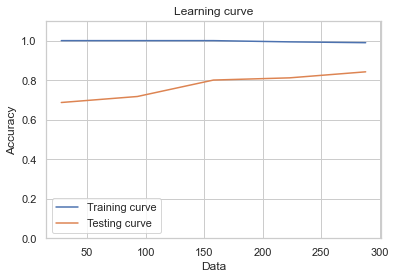

In [32]:
from sklearn.model_selection import learning_curve


#Model
random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,random_state=1)

sizes, train_scores, test_scores = learning_curve(random_model,train_X, y_train)

plt.figure()
plt.plot(sizes, np.mean(train_scores, axis = 1), label = 'Training curve')
plt.plot(sizes, np.mean(test_scores, axis = 1), label = 'Testing curve')
plt.title('Learning curve')
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend(loc='best')
plt.show()

## Shap visualizations 

In [245]:
feature_stat = pd.concat([df_train.mean(), df_train.std()], axis = 1)
feature_stat.columns = ['mean','std']
feature_stat

,mean,std
4,89.349030,16.099346
7,169.235457,34.191170
10,34.963651,58.142931
14,74.673130,14.167787
17,21.274238,20.776446
90,4.243767,13.163349
92,19.567867,20.105043
166,1.008587,1.260625
167,14.013019,13.675006
168,21.200000,13.628120


## Visualize the features leading to false negatives using SHAP  

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


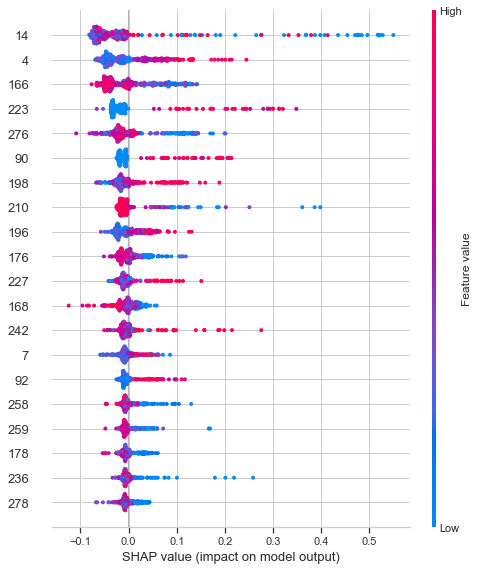

In [167]:
#shap 
import shap
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(bootstrap= False,
 max_depth= 10,
 max_features= 10,random_state=1)

random_model.fit(df_train, y_train)

explainer = shap.TreeExplainer(random_model)
shap_values = explainer.shap_values(df_train, y = y_train, check_additivity = False)
shap.summary_plot(shap_values[1], df_train)

Real target value:  1


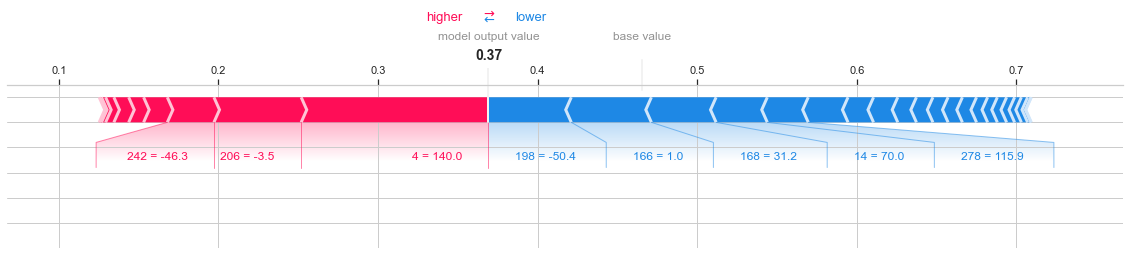

In [268]:
test_shap_values = explainer.shap_values(df_test, y = y_test, check_additivity = False)

df_shap = pd.DataFrame(test_shap_values[1])
df_shap.index = df_test.index

#false negatives 
index = df_test[(y_pred == 0) & (y_test == 1)].index.tolist()

i = index[9]
 
print("Real target value: ", y_test.loc[i])
feature_names = list(map(str,df_train.columns.tolist()))
shap.force_plot(explainer.expected_value[1], df_shap.loc[i,:].values, df_test.loc[i,:].values , feature_names = feature_names,  matplotlib = True)

In [300]:
shap.initjs()

# True Positive and False Positive for label 1:
TP    = df_test[(y_pred == 1) & (y_test == 1)].index.tolist()
FP    = df_test[(y_pred == 1) & (y_test == 0)].index.tolist()

# Explaining a True Positive example:
x  = df_test.loc[TP[2],:]

explainer = shap.TreeExplainer(random_model, df_train)

TP_TN = df_test[y_pred == y_test].index.tolist()
shap_values = explainer.shap_values(df_test.loc[TP_TN,:], check_additivity=False)
shap.force_plot(explainer.expected_value[1], shap_values[1],df_test.loc[TP_TN,:],feature_names=df_train.columns)


In [ ]:
# With this plot we gather every information we could've had with the previous ones. 

# XGBoost 

### With feature selection

In [608]:
xgb = XGBClassifier(eta = 0.3, gamma = 1.2 , max_depth = 4, objective='binary:logistic', min_child_weight = 3, reg_lambda = 12, subsample=1,scale_pos_weight=1.9
                   )
cv_results = cross_validate(xgb,df_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 1.000
Testing cross validation accuracy: 0.7728


### On the test set

In [622]:
xgb = XGBClassifier(eta = 0.3, gamma = 1.2 , max_depth = 4, min_child_weight = 3, reg_lambda = 12)
xgb.fit(df_train, y_train)
preds = xgb.predict(df_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 85.71


## Grid search for XGBoost 

In [624]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eta' : [0.80,1],
    'gamma' : [0.3,0.8,1.2,1.3], 
    'max_depth': [2,4,5], 
    'min_child_weight' : [3,3.3,3.5], 
    'reg_lambda' : [1,5,8,12],
    'subsample':[0.85,1],
    'scale_pos_weight':[1,1.4,1.6]
}

model = XGBClassifier()

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, verbose=2, n_jobs = -1, cv=5)

rf_grid.fit(df_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4524 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6226 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:  6.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.8, 1], 'gamma': [

In [579]:
rf_grid.best_params_

{'eta': 0.1,
 'gamma': 0.5,
 'max_depth': 2,
 'min_child_weight': 3.3,
 'reg_lambda': 1,
 'scale_pos_weight': 1.4,
 'subsample': 1}

In [580]:
rf_grid.best_score_

0.8198249619482496

In [626]:
xgb = XGBClassifier(eta = 0.1, gamma = 0.5 , max_depth = 2, objective='binary:logistic', min_child_weight = 3.3, reg_lambda = 1, subsample=1,scale_pos_weight=1.4
                   )
cv_results = cross_validate(xgb,df_train,y_train, return_train_score = True)

print('Training cross validation accuracy: %1.3f' % cv_results['train_score'].mean())
print('Testing cross validation accuracy: %1.4f' % cv_results['test_score'].mean())

Training cross validation accuracy: 0.936
Testing cross validation accuracy: 0.8198


In [627]:
xgb = XGBClassifier(eta = 0.1, gamma = 0.5 , max_depth = 2, objective='binary:logistic', min_child_weight = 3.3, reg_lambda = 1, subsample=1,scale_pos_weight=1.4
                   )
xgb.fit(df_train, y_train)
preds = xgb.predict(df_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 80.22


In [ ]:
# Better accuracy on the testing set using manually-selected parameters
#The issue is still the same: the size of the test set is too small 
#supposing we have almost 0.5 chance of predicting 1, the confidence interval is around 0.1 which is very high 